In [1]:
# !pip install svgling

In [3]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

CPU times: user 1.92 s, sys: 851 ms, total: 2.77 s
Wall time: 2.1 s


In [2]:
%%time
df = pd.read_csv("Womens_Clothing.csv")
df.head()
df.shape

CPU times: user 92.9 ms, sys: 12.3 ms, total: 105 ms
Wall time: 112 ms


(23486, 11)

In [3]:
%%time
df.drop(['Unnamed: 0', 'Clothing ID', 'Title' ], axis=1, inplace=True)

CPU times: user 1.71 ms, sys: 852 µs, total: 2.56 ms
Wall time: 3.95 ms


In [4]:
%%time
df.isnull().sum()/len(df)*100

CPU times: user 20.7 ms, sys: 1.46 ms, total: 22.1 ms
Wall time: 22 ms


Age                        0.000000
Review Text                3.597888
Rating                     0.000000
Recommended IND            0.000000
Positive Feedback Count    0.000000
Division Name              0.059610
Department Name            0.059610
Class Name                 0.059610
dtype: float64

In [5]:
%%time
df.loc[df['Recommended IND'] == 1, "Review Text"] = df.loc[df['Recommended IND'] == 1, "Review Text"].fillna("1")

df.loc[df['Recommended IND'] == 0, "Review Text"] = df.loc[df['Recommended IND'] == 0, "Review Text"].fillna("0")

CPU times: user 14.6 ms, sys: 2.61 ms, total: 17.2 ms
Wall time: 14.8 ms


In [6]:
%%time
df.dropna(subset=['Division Name'], inplace=True)


CPU times: user 13.7 ms, sys: 2.96 ms, total: 16.6 ms
Wall time: 14.4 ms


In [7]:
%%time
df.isnull().sum()

CPU times: user 21.7 ms, sys: 760 µs, total: 22.5 ms
Wall time: 22.2 ms


Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [8]:
%%time
df.head()

CPU times: user 123 µs, sys: 17 µs, total: 140 µs
Wall time: 132 µs


,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


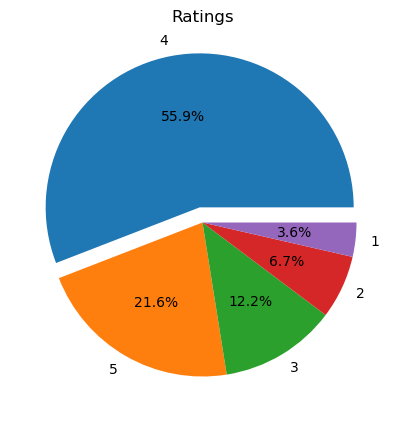

CPU times: user 98.2 ms, sys: 7.81 ms, total: 106 ms
Wall time: 75.5 ms


In [9]:
%%time
## Univariate Analysis.
plt.figure(figsize=(5,5))
plt.pie(df.Rating.value_counts(), autopct="%1.1f%%",
        labels=df.Rating.unique(),
        explode=(0.1,0,0,0,0))
plt.title('Ratings')
plt.show()

In [10]:
# plt.pie(df["Rating"], autopct="%1.1f%%")

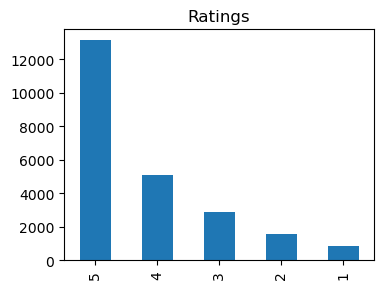

CPU times: user 131 ms, sys: 3.9 ms, total: 135 ms
Wall time: 57.4 ms


In [11]:
%%time
plt.figure(figsize=(4,3))
df.Rating.value_counts().plot(kind='bar')
plt.title('Ratings')
plt.show()


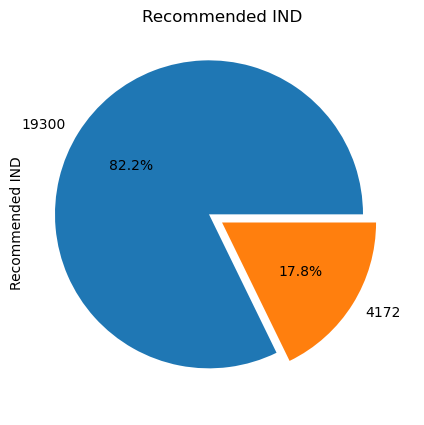

CPU times: user 113 ms, sys: 5.46 ms, total: 118 ms
Wall time: 40 ms


In [12]:
%%time
plt.figure(figsize=(5,5))
df['Recommended IND'].value_counts().plot(kind='pie', autopct="%1.1f%%",
        labels=pd.DataFrame(df['Recommended IND'].value_counts()).reset_index()['Recommended IND'],
        explode=(0.1,0))
plt.title('Recommended IND')
plt.show()

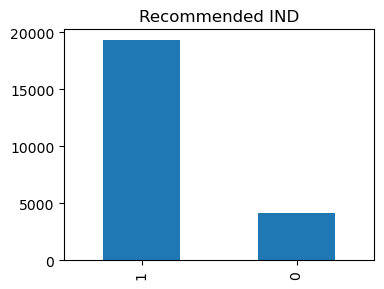

CPU times: user 136 ms, sys: 6.41 ms, total: 143 ms
Wall time: 48 ms


In [13]:
%%time
plt.figure(figsize=(4,3))
df['Recommended IND'].value_counts().plot(kind='bar')
plt.title('Recommended IND')
plt.show()

<timed exec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



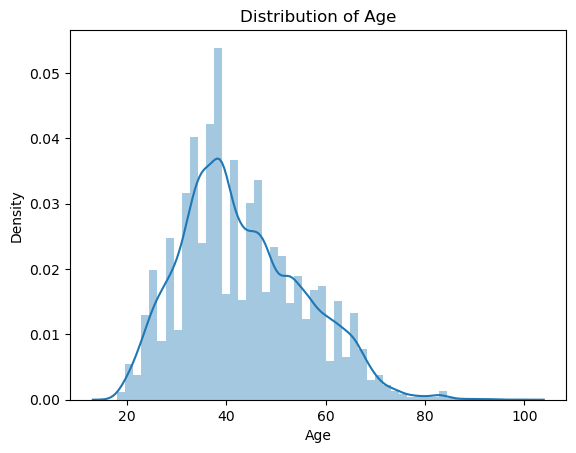

CPU times: user 474 ms, sys: 439 ms, total: 912 ms
Wall time: 142 ms


In [14]:
%%time
sns.distplot(df['Age'])
plt.title("Distribution of Age")
plt.show()


<timed exec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



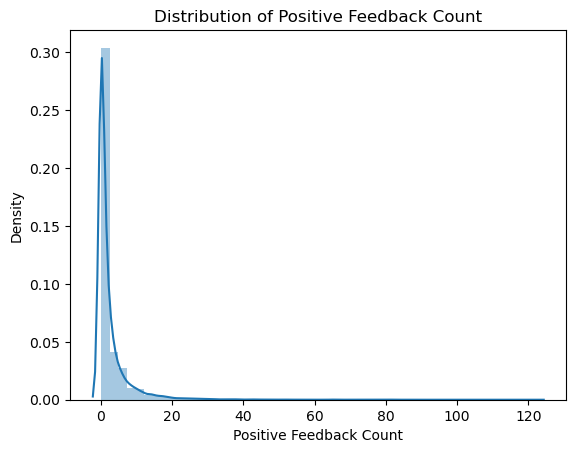

CPU times: user 523 ms, sys: 489 ms, total: 1.01 s
Wall time: 146 ms


In [15]:
%%time
sns.distplot(df['Positive Feedback Count'])
plt.title("Distribution of Positive Feedback Count")
plt.show()

In [16]:
%%time
df.describe(include='object').T

CPU times: user 111 ms, sys: 172 ms, total: 283 ms
Wall time: 42.3 ms


,count,unique,top,freq
Review Text,23472,22623,1,773
Division Name,23472,3,General,13850
Department Name,23472,6,Tops,10468
Class Name,23472,20,Dresses,6319


In [17]:
%%time
df.describe(exclude='object').T

CPU times: user 5.68 ms, sys: 1.14 ms, total: 6.81 ms
Wall time: 5.62 ms


,count,mean,std,min,25%,50%,75%,max
Age,23472.0,43.200707,12.280913,18.0,34.0,41.0,52.0,99.0
Rating,23472.0,4.195552,1.110188,1.0,4.0,5.0,5.0,5.0
Recommended IND,23472.0,0.822256,0.382305,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,23472.0,2.537151,5.703597,0.0,0.0,1.0,3.0,122.0


CPU times: user 56.5 ms, sys: 4.84 ms, total: 61.4 ms
Wall time: 58.1 ms


<Axes: xlabel='count', ylabel='Class Name'>

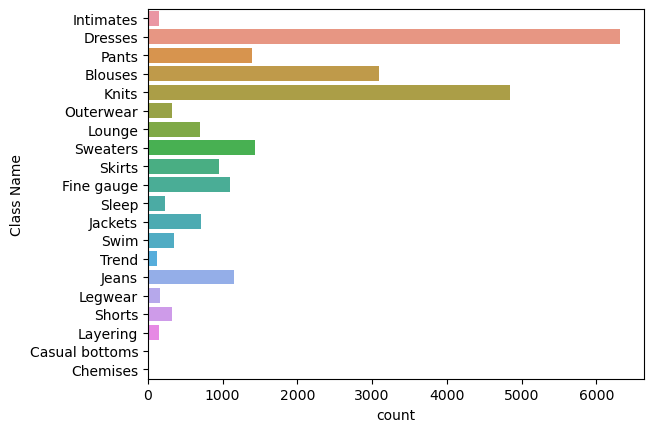

In [18]:
%%time
sns.countplot(y=df["Class Name"])

In [19]:
%%time
df["Class Name"].value_counts()


CPU times: user 2.26 ms, sys: 80 µs, total: 2.34 ms
Wall time: 848 µs


Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [20]:
%%time
df["Class Name"].unique()

CPU times: user 2.39 ms, sys: 958 µs, total: 3.35 ms
Wall time: 2.32 ms


array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', 'Chemises'], dtype=object)

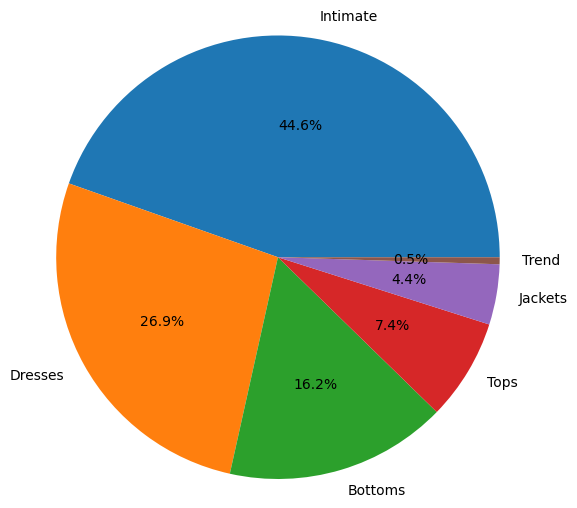

CPU times: user 121 ms, sys: 8.34 ms, total: 129 ms
Wall time: 78.7 ms


In [21]:
%%time
plt.pie(df["Department Name"].value_counts(),radius=1.5, autopct="%1.1f%%",labels=df["Department Name"].unique())
plt.show()

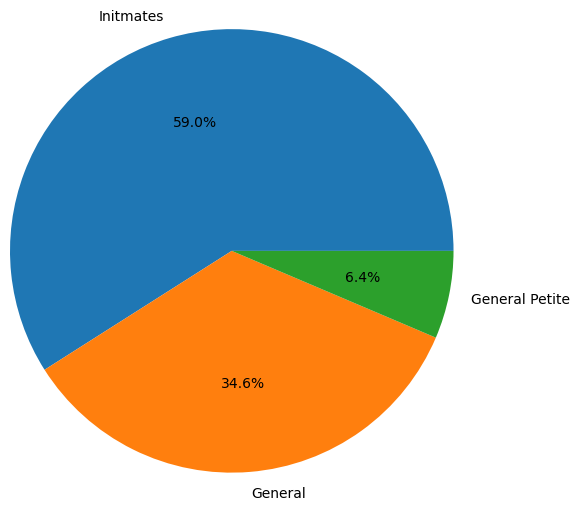

CPU times: user 103 ms, sys: 6.2 ms, total: 110 ms
Wall time: 65 ms


In [22]:
%%time
plt.pie(df["Division Name"].value_counts(),radius=1.5, autopct="%1.1f%%",labels=df["Division Name"].unique())
plt.show()

In [23]:
%%time
pd.crosstab(df["Division Name"],df["Recommended IND"])

CPU times: user 15.1 ms, sys: 2.84 ms, total: 17.9 ms
Wall time: 18 ms


Recommended IND,0,1
Division Name,,
General,2537,11313
General Petite,1413,6707
Initmates,222,1280


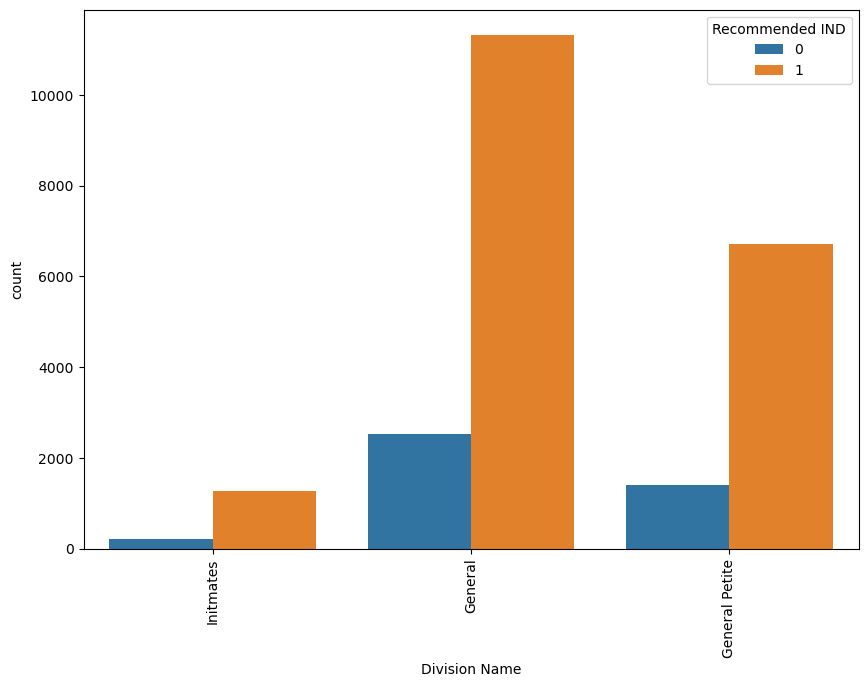

CPU times: user 197 ms, sys: 6.53 ms, total: 204 ms
Wall time: 94.3 ms


In [24]:
%%time
plt.figure(figsize=(10,7))
sns.countplot(x=df["Division Name"],hue=df["Recommended IND"])
plt.xticks(rotation=90, ha='center')
plt.show()


In [25]:
%%time
pd.crosstab(df["Department Name"],df["Recommended IND"])


CPU times: user 16.9 ms, sys: 1.6 ms, total: 18.5 ms
Wall time: 5.75 ms


Recommended IND,0,1
Department Name,,
Bottoms,565,3234
Dresses,1212,5107
Intimate,260,1475
Jackets,169,863
Tops,1935,8533
Trend,31,88


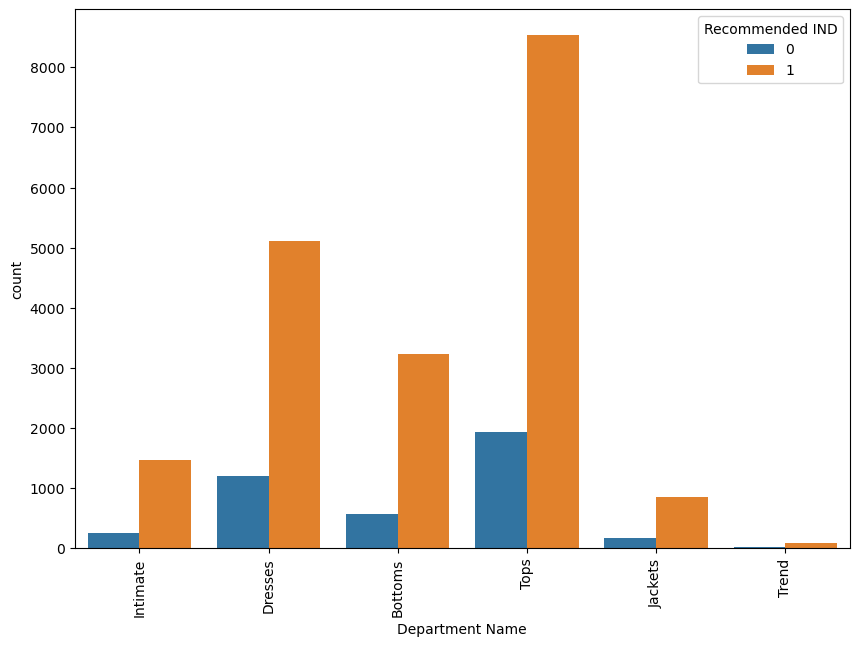

CPU times: user 175 ms, sys: 4.2 ms, total: 180 ms
Wall time: 79.2 ms


In [26]:
%%time
plt.figure(figsize=(10,7))
sns.countplot(x=df["Department Name"],hue=df["Recommended IND"])
plt.xticks(rotation=90, ha='center')
plt.show()

In [27]:
%%time
pd.crosstab(df["Class Name"],df["Recommended IND"])

CPU times: user 15.4 ms, sys: 2.99 ms, total: 18.3 ms
Wall time: 16.9 ms


Recommended IND,0,1
Class Name,,
Blouses,588,2509
Casual bottoms,0,2
Chemises,0,1
Dresses,1212,5107
Fine gauge,179,921
Intimates,22,132
Jackets,109,595
Jeans,136,1011
Knits,883,3960


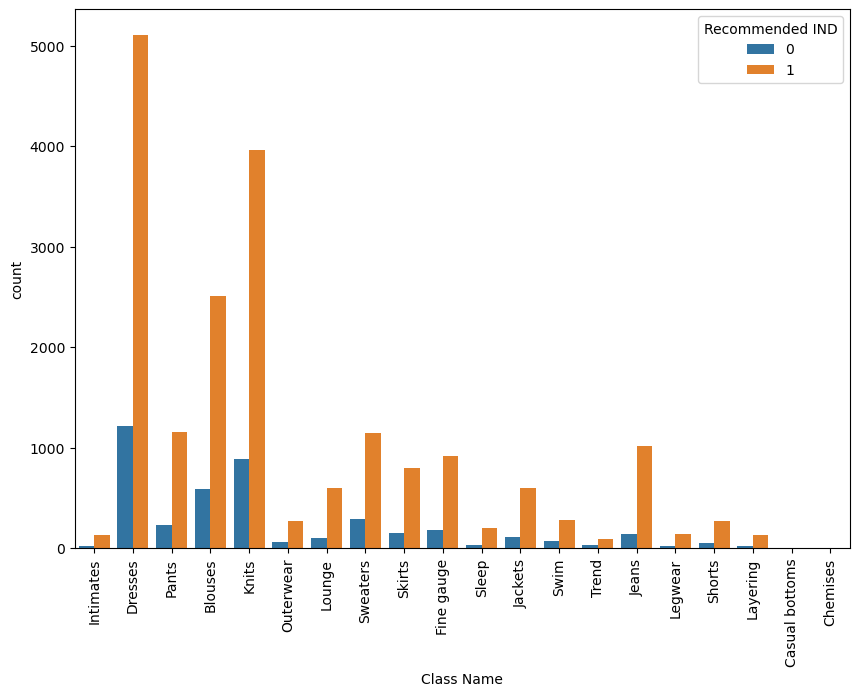

CPU times: user 404 ms, sys: 11 ms, total: 415 ms
Wall time: 183 ms


In [28]:
%%time
plt.figure(figsize=(10,7))
sns.countplot(x=df["Class Name"],hue=df["Recommended IND"])
plt.xticks(rotation=90, ha='center')
plt.show()


CPU times: user 31.3 ms, sys: 3.57 ms, total: 34.8 ms
Wall time: 32.4 ms


<Axes: xlabel='Recommended IND', ylabel='Positive Feedback Count'>

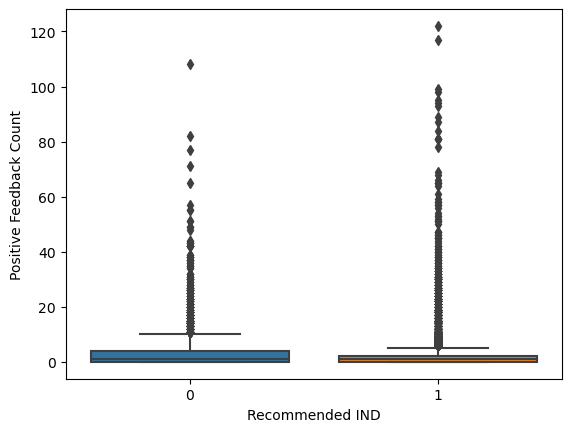

In [29]:
%%time
# Age,Rating,Positive Feedback Count v/s Recommended IND

#plt.figure(figsize= (4,3))
sns.boxplot(y = df["Positive Feedback Count"], x = df["Recommended IND"])

CPU times: user 36.9 ms, sys: 1.55 ms, total: 38.4 ms
Wall time: 12.2 ms


<Axes: xlabel='Recommended IND', ylabel='Age'>

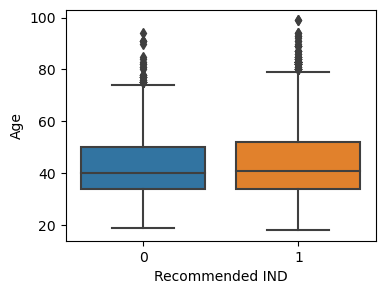

In [30]:
%%time
plt.figure(figsize= (4,3))
sns.boxplot(y = df["Age"], x = df["Recommended IND"])

CPU times: user 35.3 ms, sys: 1.68 ms, total: 37 ms
Wall time: 12.4 ms


<Axes: xlabel='Recommended IND', ylabel='Rating'>

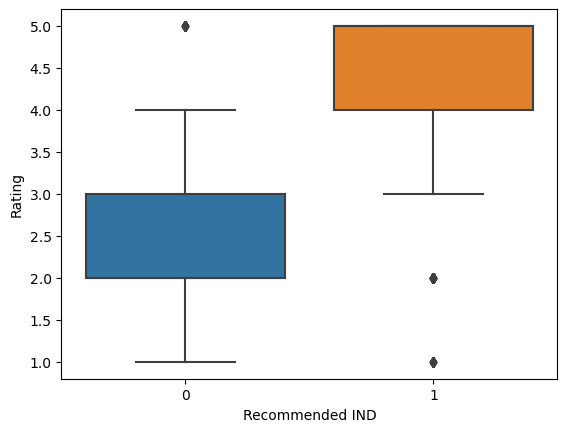

In [31]:
%%time
sns.boxplot(y = df["Rating"], x = df["Recommended IND"])

CPU times: user 4.27 s, sys: 1.93 s, total: 6.2 s
Wall time: 2.97 s


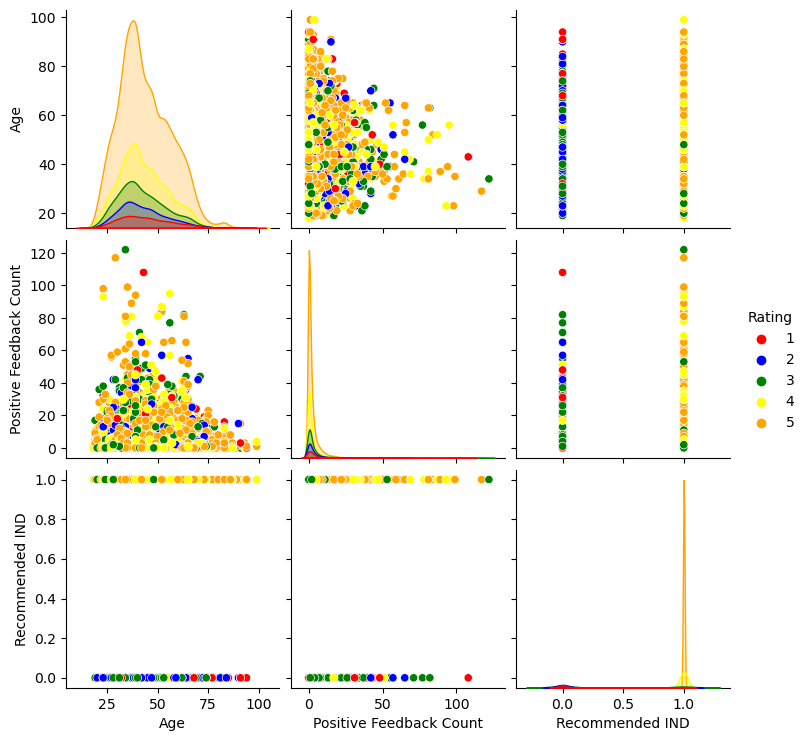

In [32]:
%%time
sns.pairplot(df[["Age","Rating","Positive Feedback Count","Recommended IND"]],
            diag_kind="kde",
            hue= "Rating",
            palette=["red", "blue", "green", "yellow", "orange"])



CPU times: user 62.8 ms, sys: 2.26 ms, total: 65.1 ms
Wall time: 30 ms


<timed eval>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

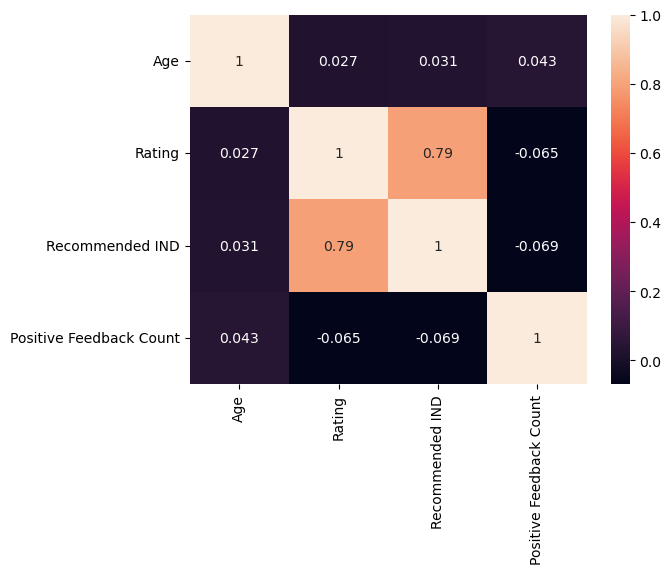

In [33]:
%%time
sns.heatmap(df.corr(),annot=True)

In [34]:
%%time
#Encoding

x=df[['Division Name', 'Department Name', 'Class Name','Age','Rating']]
y=df[['Recommended IND']]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.9,random_state=10)

cat_col=['Division Name', 'Department Name', 'Class Name']

for i in cat_col:
    geo_encode = xtrain[i].value_counts().to_dict()
    geo_encode

    xtest[i] = xtest[i].map(geo_encode)

    xtrain[i] = xtrain[i].map(geo_encode)

CPU times: user 32 ms, sys: 2.84 ms, total: 34.8 ms
Wall time: 12.4 ms


In [4]:
%%time
# NLP basics

import nltk

token = nltk.wordpunct_tokenize(df["Review Text"][2])
token

CPU times: user 95.2 ms, sys: 72.2 ms, total: 167 ms
Wall time: 434 ms


In [36]:
%%time
taged=nltk.pos_tag(token)
taged

CPU times: user 37.1 ms, sys: 6.71 ms, total: 43.8 ms
Wall time: 45.7 ms


[('I', 'PRP'),
 ('had', 'VBD'),
 ('such', 'JJ'),
 ('high', 'JJ'),
 ('hopes', 'NNS'),
 ('for', 'IN'),
 ('this', 'DT'),
 ('dress', 'NN'),
 ('and', 'CC'),
 ('really', 'RB'),
 ('wanted', 'VBD'),
 ('it', 'PRP'),
 ('to', 'TO'),
 ('work', 'VB'),
 ('for', 'IN'),
 ('me', 'PRP'),
 ('.', '.'),
 ('i', 'VB'),
 ('initially', 'RB'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('petite', 'JJ'),
 ('small', 'JJ'),
 ('(', '('),
 ('my', 'PRP$'),
 ('usual', 'JJ'),
 ('size', 'NN'),
 (')', ')'),
 ('but', 'CC'),
 ('i', 'JJ'),
 ('found', 'VBD'),
 ('this', 'DT'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('outrageously', 'RB'),
 ('small', 'JJ'),
 ('.', '.'),
 ('so', 'RB'),
 ('small', 'JJ'),
 ('in', 'IN'),
 ('fact', 'NN'),
 ('that', 'IN'),
 ('i', 'NN'),
 ('could', 'MD'),
 ('not', 'RB'),
 ('zip', 'VB'),
 ('it', 'PRP'),
 ('up', 'RP'),
 ('!', '.'),
 ('i', 'NN'),
 ('reordered', 'VBD'),
 ('it', 'PRP'),
 ('in', 'IN'),
 ('petite', 'JJ'),
 ('medium', 'NN'),
 (',', ','),
 ('which', 'WDT'),
 ('was', 'VBD'),
 ('just', 'RB'),
 ('ok', 'JJ'),

CPU times: user 66.4 ms, sys: 12 ms, total: 78.4 ms
Wall time: 82.9 ms


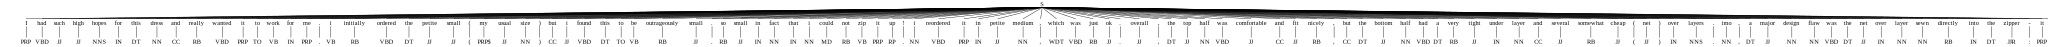

In [37]:
%%time
entity=nltk.chunk.ne_chunk(taged)
entity

In [38]:
%%time
entity.pprint()

(S
  I/PRP
  had/VBD
  such/JJ
  high/JJ
  hopes/NNS
  for/IN
  this/DT
  dress/NN
  and/CC
  really/RB
  wanted/VBD
  it/PRP
  to/TO
  work/VB
  for/IN
  me/PRP
  ./.
  i/VB
  initially/RB
  ordered/VBD
  the/DT
  petite/JJ
  small/JJ
  (/(
  my/PRP$
  usual/JJ
  size/NN
  )/)
  but/CC
  i/JJ
  found/VBD
  this/DT
  to/TO
  be/VB
  outrageously/RB
  small/JJ
  ./.
  so/RB
  small/JJ
  in/IN
  fact/NN
  that/IN
  i/NN
  could/MD
  not/RB
  zip/VB
  it/PRP
  up/RP
  !/.
  i/NN
  reordered/VBD
  it/PRP
  in/IN
  petite/JJ
  medium/NN
  ,/,
  which/WDT
  was/VBD
  just/RB
  ok/JJ
  ./.
  overall/JJ
  ,/,
  the/DT
  top/JJ
  half/NN
  was/VBD
  comfortable/JJ
  and/CC
  fit/JJ
  nicely/RB
  ,/,
  but/CC
  the/DT
  bottom/JJ
  half/NN
  had/VBD
  a/DT
  very/RB
  tight/JJ
  under/IN
  layer/NN
  and/CC
  several/JJ
  somewhat/RB
  cheap/JJ
  (/(
  net/JJ
  )/)
  over/IN
  layers/NNS
  ./.
  imo/NN
  ,/,
  a/DT
  major/JJ
  design/NN
  flaw/NN
  was/VBD
  the/DT
  net/JJ
  over/IN
  layer/NN

In [39]:
 # vader(Valence Aware Dictionary and sEntiment Reasoner)-bag of words
    
    # it take the words and validateds them if they are +ve or -ve or nutral
    

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [20]:
%%time
sia=SentimentIntensityAnalyzer()
print(sia.polarity_scores(df["Review Text"][2]))
df["Review Text"][2]

CPU times: user 6.86 ms, sys: 279 µs, total: 7.14 ms
Wall time: 7.17 ms


In [21]:
%%time
res1=[]

for i in df["Review Text"]:
    txt = i
    score=sia.polarity_scores(txt)
    res1.append(score)

NameError: name 'df' is not defined

In [43]:
%%time
scores=pd.DataFrame(res1)
scores.reset_index()
scores.shape

CPU times: user 12.8 ms, sys: 4.05 ms, total: 16.9 ms
Wall time: 17.6 ms


(23472, 4)

In [44]:
%%time
df.reset_index()
df.shape

CPU times: user 2.14 ms, sys: 1.41 ms, total: 3.55 ms
Wall time: 3.16 ms


(23472, 8)

In [45]:
%%time
final = pd.merge(df, scores, left_index=True, right_index=True, how='left')
final.head()

CPU times: user 3.64 ms, sys: 2.11 ms, total: 5.75 ms
Wall time: 6.33 ms


,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,neg,neu,pos,compound
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.000,0.272,0.728,0.8932
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.000,0.664,0.336,0.9729
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.027,0.792,0.181,0.9427
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.226,0.340,0.434,0.5727
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.000,0.700,0.300,0.9291


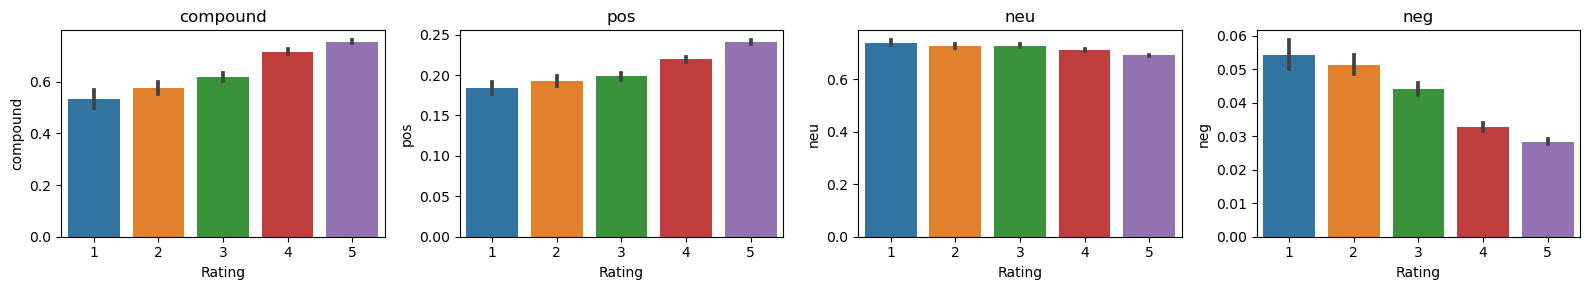

CPU times: user 1.32 s, sys: 15.6 ms, total: 1.33 s
Wall time: 1.04 s


In [46]:
%%time
fig,axs = plt.subplots(1,4,figsize=(16,3))

sns.barplot(x=final["Rating"],y=final["compound"],ax=axs[0])
sns.barplot(x=final["Rating"],y=final["pos"],ax=axs[1])
sns.barplot(x=final["Rating"],y=final["neu"],ax=axs[2])
sns.barplot(x=final["Rating"],y=final["neg"],ax=axs[3])
axs[0].set_title("compound")
axs[1].set_title("pos")
axs[2].set_title("neu")
axs[3].set_title("neg")
plt.tight_layout()
plt.show()

In [40]:
%%time
# RoBERTa Model

from transformers import AutoTokenizer,AutoModelForSequenceClassification
from scipy.special import softmax

CPU times: user 34 µs, sys: 149 µs, total: 183 µs
Wall time: 193 µs


In [39]:
#tokenizer = AutoTokenizer.from_pretrained(null_df)

HFValidationError: Repo id must use alphanumeric chars or '-', '_', '.', '--' and '..' are forbidden, '-' and '.' cannot start or end the name, max length is 96: '       Age                                        Review Text  Rating  \
23458   32  I saw the shirt on the retailer website and ne...       5   
23459   29  Great quality and extremely flattering. bonus ...       5   
23460   32  Yes, this is a great dress! i wasn't sure abou...       5   
23461   41  Cute dress but not for me.  the waist is too h...       3   
23462   27  These bottoms are very cute but defiantly chee...       4   
23463   39  I'm so impressed with the beautiful color comb...       4   
23464   32  I was surprised at the positive reviews for th...       1   
23465   42  So i wasn't sure about ordering this skirt bec...       5   
23466   35                                                  1       5   
23467   34  I was very happy to snag this dress at such a ...       5   
23468   48  It reminds me of maternity clothes. soft, stre...       3   
23469   31  This fit well, but the top was very see throug...       3   
23470   28  I bought this dress for a wedding i have this ...       3   
23471   52  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
23458                1                        0         General   
23459                1                        1  General Petite   
23460                1                        0  General Petite   
23461                1                        0  General Petite   
23462                1                        0       Initmates   
23463                1                        5  General Petite   
23464                0                        0  General Petite   
23465                1                        0  General Petite   
23466                1                        0  General Petite   
23467                1                        0  General Petite   
23468                1                        0  General Petite   
23469                0                        1  General Petite   
23470                1                        2         General   
23471                1                       22  General Petite   

      Department Name Class Name  
23458            Tops      Knits  
23459         Dresses    Dresses  
23460         Dresses    Dresses  
23461         Dresses    Dresses  
23462        Intimate       Swim  
23463         Dresses    Dresses  
23464         Dresses    Dresses  
23465         Bottoms     Skirts  
23466            Tops      Knits  
23467         Dresses    Dresses  
23468            Tops      Knits  
23469         Dresses    Dresses  
23470         Dresses    Dresses  
23471         Dresses    Dresses  '.

In [41]:
%%time
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

CPU times: user 902 ms, sys: 773 ms, total: 1.67 s
Wall time: 4.22 s


In [51]:
%%time
sia.polarity_scores(df["Review Text"][4])

CPU times: user 2.05 ms, sys: 3.36 ms, total: 5.41 ms
Wall time: 1.69 ms


{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.9291}

In [42]:
%%time
# Run for Roberta Model
encoded_text = tokenizer(df["Review Text"][2], return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

NameError: name 'df' is not defined

In [33]:
%%time
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

CPU times: user 7 µs, sys: 8 µs, total: 15 µs
Wall time: 37 µs


In [54]:
%%time
res2 = []
for i in df["Review Text"]:
    text=i
    roberta_result = polarity_scores_roberta(text)
    res2.append(roberta_result)
res2

CPU times: user 2h 55min 23s, sys: 48min 53s, total: 3h 44min 16s
Wall time: 6h 27min 5s


[{'roberta_neg': 0.0022446492,
  'roberta_neu': 0.010575595,
  'roberta_pos': 0.9871797},
 {'roberta_neg': 0.00160882,
  'roberta_neu': 0.0074361362,
  'roberta_pos': 0.99095505},
 {'roberta_neg': 0.36680317,
  'roberta_neu': 0.38013974,
  'roberta_pos': 0.25305706},
 {'roberta_neg': 0.0022465817,
  'roberta_neu': 0.0046220543,
  'roberta_pos': 0.99313134},
 {'roberta_neg': 0.001238591,
  'roberta_neu': 0.006733104,
  'roberta_pos': 0.9920283},
 {'roberta_neg': 0.17049019,
  'roberta_neu': 0.2835654,
  'roberta_pos': 0.5459444},
 {'roberta_neg': 0.005863488,
  'roberta_neu': 0.072108604,
  'roberta_pos': 0.9220279},
 {'roberta_neg': 0.00905966,
  'roberta_neu': 0.14245202,
  'roberta_pos': 0.84848833},
 {'roberta_neg': 0.001397365,
  'roberta_neu': 0.011456452,
  'roberta_pos': 0.98714614},
 {'roberta_neg': 0.003420234,
  'roberta_neu': 0.0271769,
  'roberta_pos': 0.9694028},
 {'roberta_neg': 0.84036654,
  'roberta_neu': 0.13353197,
  'roberta_pos': 0.026101446},
 {'roberta_neg': 0.001

In [55]:
%%time
scores2=pd.DataFrame(res2)
scores2.reset_index()
scores2.shape

CPU times: user 134 ms, sys: 103 ms, total: 237 ms
Wall time: 40.9 ms


(23472, 3)

In [56]:
%%time
scores2.head()

CPU times: user 1.5 ms, sys: 1.12 ms, total: 2.62 ms
Wall time: 484 µs


,roberta_neg,roberta_neu,roberta_pos
0,0.002245,0.010576,0.987180
1,0.001609,0.007436,0.990955
2,0.366803,0.380140,0.253057
3,0.002247,0.004622,0.993131
4,0.001239,0.006733,0.992028


In [57]:
%%time
final2 = pd.merge(final, scores2, left_index=True, right_index=True, how='left')
final2.head()

CPU times: user 62.4 ms, sys: 48 ms, total: 110 ms
Wall time: 19.2 ms


,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.000,0.272,0.728,0.8932,0.002245,0.010576,0.987180
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.000,0.664,0.336,0.9729,0.001609,0.007436,0.990955
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.027,0.792,0.181,0.9427,0.366803,0.380140,0.253057
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.226,0.340,0.434,0.5727,0.002247,0.004622,0.993131
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.000,0.700,0.300,0.9291,0.001239,0.006733,0.992028


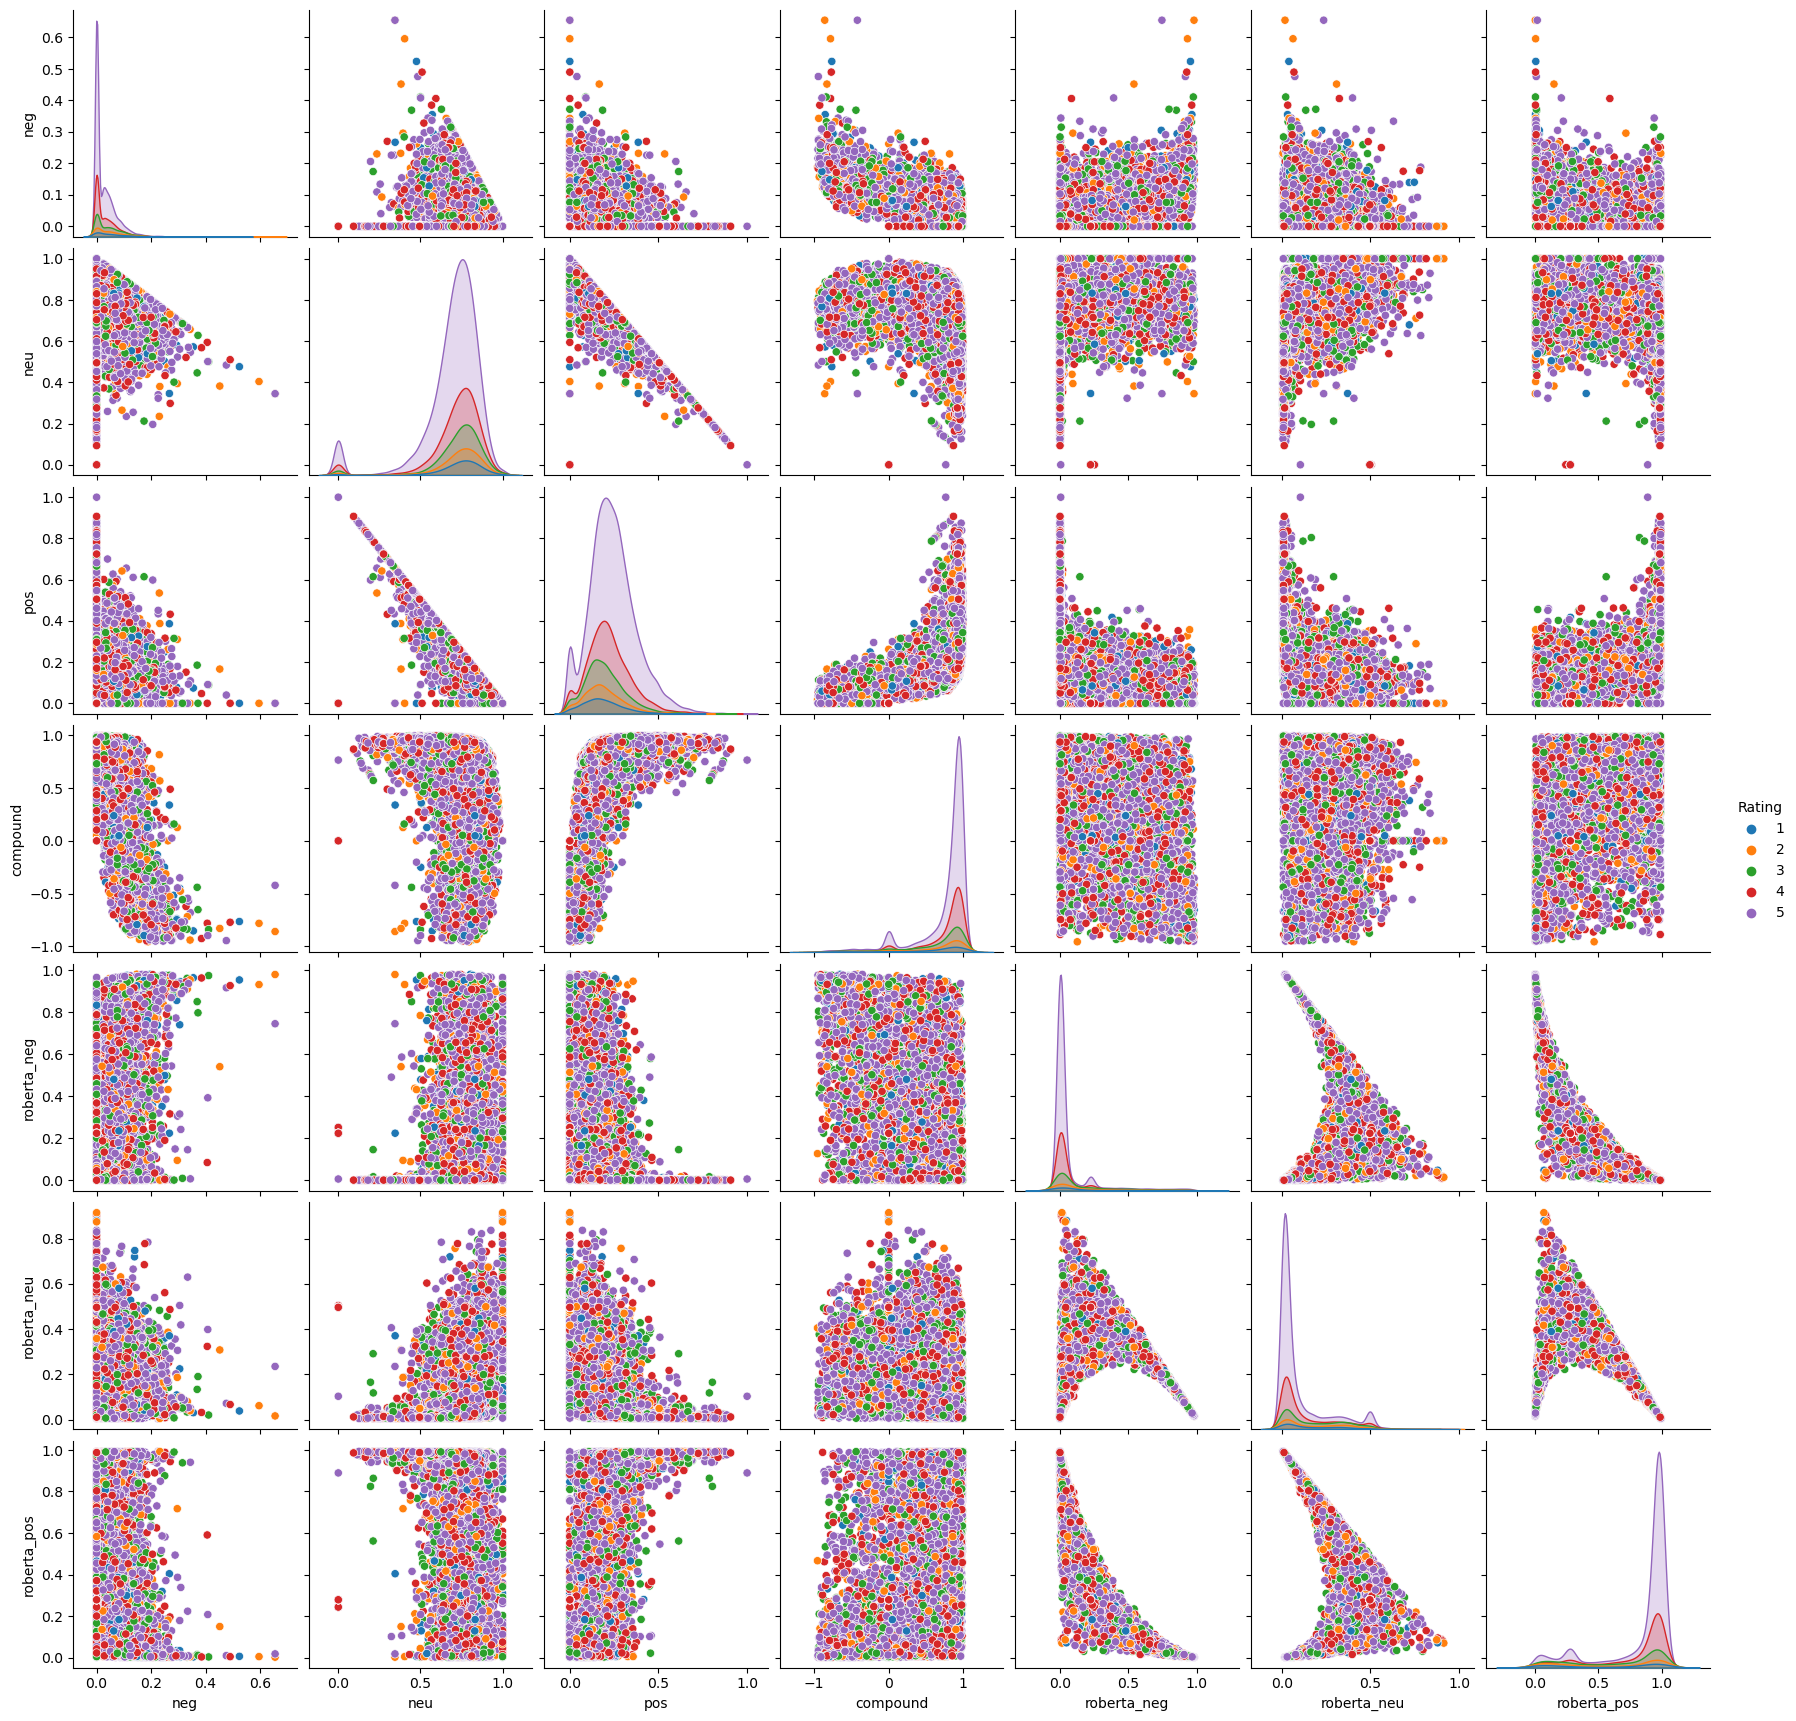

CPU times: user 30.2 s, sys: 3.38 s, total: 33.5 s
Wall time: 30min 42s


In [58]:
%%time
sns.pairplot(data=final2,vars=["neg","neu","pos","compound","roberta_neg","roberta_neu","roberta_pos"],
             hue="Rating",palette="tab10")
plt.show()

In [31]:
%%time
from transformers import pipeline

sent_pipeline = pipeline ("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


CPU times: user 655 ms, sys: 477 ms, total: 1.13 s
Wall time: 2.83 s


In [60]:
%%time
sent_result = []
for i in df['Review Text']:
    result = sent_pipeline(i)
    sent_result.append(result)

sent_result

CPU times: user 1h 18min 37s, sys: 21min 5s, total: 1h 39min 43s
Wall time: 13min 48s


[[{'label': 'POSITIVE', 'score': 0.9998770952224731}],
 [{'label': 'POSITIVE', 'score': 0.9986839890480042}],
 [{'label': 'POSITIVE', 'score': 0.9885602593421936}],
 [{'label': 'POSITIVE', 'score': 0.9998878240585327}],
 [{'label': 'POSITIVE', 'score': 0.9993934631347656}],
 [{'label': 'NEGATIVE', 'score': 0.877742350101471}],
 [{'label': 'NEGATIVE', 'score': 0.6675677299499512}],
 [{'label': 'POSITIVE', 'score': 0.8755170106887817}],
 [{'label': 'POSITIVE', 'score': 0.9953872561454773}],
 [{'label': 'POSITIVE', 'score': 0.9975186586380005}],
 [{'label': 'NEGATIVE', 'score': 0.9996395111083984}],
 [{'label': 'POSITIVE', 'score': 0.9998140931129456}],
 [{'label': 'POSITIVE', 'score': 0.9985336065292358}],
 [{'label': 'POSITIVE', 'score': 0.9908121228218079}],
 [{'label': 'NEGATIVE', 'score': 0.991184413433075}],
 [{'label': 'POSITIVE', 'score': 0.9974316954612732}],
 [{'label': 'POSITIVE', 'score': 0.9995400905609131}],
 [{'label': 'POSITIVE', 'score': 0.9997902512550354}],
 [{'label': 

In [61]:
label=[]
for i in sent_result:
    j=0
    label.append(i[j]["label"])
    j+=1
label

['POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',

In [62]:
%%time
final2["sent_result"]=label

CPU times: user 40.7 ms, sys: 28.6 ms, total: 69.3 ms
Wall time: 12.6 ms


In [63]:
%%time
final2.head()

CPU times: user 3.38 ms, sys: 3.76 ms, total: 7.13 ms
Wall time: 1.55 ms


,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,sent_result
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.000,0.272,0.728,0.8932,0.002245,0.010576,0.987180,POSITIVE
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.000,0.664,0.336,0.9729,0.001609,0.007436,0.990955,POSITIVE
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.027,0.792,0.181,0.9427,0.366803,0.380140,0.253057,POSITIVE
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.226,0.340,0.434,0.5727,0.002247,0.004622,0.993131,POSITIVE
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.000,0.700,0.300,0.9291,0.001239,0.006733,0.992028,POSITIVE


In [64]:
final2["sent_result"].value_counts()

POSITIVE    17436
NEGATIVE     6036
Name: sent_result, dtype: int64

In [65]:
final2[final2["Rating"]==1]

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,sent_result
61,36,"3 tags sewn in, 2 small (about 1'' long) and 1...",1,0,0,Initmates,Intimate,Intimates,0.174,0.738,0.087,-0.8031,0.565930,0.309928,0.124142,NEGATIVE
85,58,"I was really hoping to like this, but it did n...",1,0,2,General Petite,Tops,Knits,0.024,0.854,0.122,0.8454,0.432237,0.442665,0.125098,POSITIVE
96,44,I usually wear a medium and bought a small. it...,1,0,0,General Petite,Tops,Blouses,0.179,0.678,0.143,-0.4579,0.401529,0.405779,0.192691,NEGATIVE
97,44,I was very excited to order this top in red xs...,1,0,0,General Petite,Tops,Knits,0.000,0.665,0.335,0.8903,0.006896,0.025672,0.967432,NEGATIVE
110,44,This is so thin and poor quality. especially f...,1,0,11,General Petite,Tops,Knits,0.171,0.715,0.114,-0.4877,0.974276,0.022619,0.003105,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23255,46,Pants are overpriced and very uncomfortable. t...,1,0,1,General,Bottoms,Pants,0.000,0.868,0.132,0.5719,0.002446,0.030343,0.967211,NEGATIVE
23274,29,"I'm 5'7"" 155lbs and ordered a large. it fit, b...",1,0,0,General,Tops,Knits,0.000,0.720,0.280,0.7871,0.002200,0.029923,0.967878,NEGATIVE
23352,57,I loved the print and fabric of this dress whe...,1,0,31,General Petite,Dresses,Dresses,0.082,0.833,0.084,0.0482,0.235948,0.580579,0.183474,NEGATIVE
23406,68,I was very excited to find a fun and lightweig...,1,0,0,General,Dresses,Dresses,0.063,0.831,0.107,0.2382,0.481148,0.389755,0.129097,NEGATIVE


In [78]:
final2["Review Text"][85]
final2["roberta_neu"][85],final2["neu"][85]

(0.4426651, 0.854)

In [70]:
final.to_csv('final.csv', index=False)
final2.to_csv('final2.csv', index=False)

In [50]:
final.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,neg,neu,pos,compound
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.000,0.272,0.728,0.8932
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.000,0.664,0.336,0.9729
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.027,0.792,0.181,0.9427
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.226,0.340,0.434,0.5727
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.000,0.700,0.300,0.9291


In [9]:
final2 = pd.read_csv("final2.csv")
final2.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,sent_result
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.000,0.272,0.728,0.8932,0.002245,0.010576,0.987180,POSITIVE
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.000,0.664,0.336,0.9729,0.001609,0.007436,0.990955,POSITIVE
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.027,0.792,0.181,0.9427,0.366803,0.380140,0.253057,POSITIVE
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.226,0.340,0.434,0.5727,0.002247,0.004622,0.993131,POSITIVE
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.000,0.700,0.300,0.9291,0.001239,0.006733,0.992028,POSITIVE


In [12]:
final2.isnull().sum()

Age                         0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name               0
Department Name             0
Class Name                  0
neg                        14
neu                        14
pos                        14
compound                   14
roberta_neg                14
roberta_neu                14
roberta_pos                14
sent_result                 0
dtype: int64

In [13]:
null_df=final2[final2.isnull().any(axis=1)]
null_df

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,sent_result
23458,32,I saw the shirt on the retailer website and ne...,5,1,0,General,Tops,Knits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE
23459,29,Great quality and extremely flattering. bonus ...,5,1,1,General Petite,Dresses,Dresses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE
23460,32,"Yes, this is a great dress! i wasn't sure abou...",5,1,0,General Petite,Dresses,Dresses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE
23461,41,Cute dress but not for me. the waist is too h...,3,1,0,General Petite,Dresses,Dresses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
23462,27,These bottoms are very cute but defiantly chee...,4,1,0,Initmates,Intimate,Swim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE
23463,39,I'm so impressed with the beautiful color comb...,4,1,5,General Petite,Dresses,Dresses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
23464,32,I was surprised at the positive reviews for th...,1,0,0,General Petite,Dresses,Dresses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE
23465,42,So i wasn't sure about ordering this skirt bec...,5,1,0,General Petite,Bottoms,Skirts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE
23466,35,1,5,1,0,General Petite,Tops,Knits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE
23467,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE


In [14]:
null_df_sent_result=null_df[["sent_result"]]
null_df_sent_result

,sent_result
23458,POSITIVE
23459,POSITIVE
23460,POSITIVE
23461,NEGATIVE
23462,POSITIVE
23463,NEGATIVE
23464,POSITIVE
23465,POSITIVE
23466,POSITIVE
23467,POSITIVE


In [17]:
null_df.drop(["neg","neu","pos","compound","roberta_neg","roberta_neu","roberta_pos","sent_result"],axis=1,inplace=True)
null_df

/var/folders/cl/__5ynzcj02z7595csc4dycjc0000gn/T/ipykernel_30651/3572832724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_df.drop(["sent_result"],axis=1,inplace=True)


,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23458,32,I saw the shirt on the retailer website and ne...,5,1,0,General,Tops,Knits
23459,29,Great quality and extremely flattering. bonus ...,5,1,1,General Petite,Dresses,Dresses
23460,32,"Yes, this is a great dress! i wasn't sure abou...",5,1,0,General Petite,Dresses,Dresses
23461,41,Cute dress but not for me. the waist is too h...,3,1,0,General Petite,Dresses,Dresses
23462,27,These bottoms are very cute but defiantly chee...,4,1,0,Initmates,Intimate,Swim
23463,39,I'm so impressed with the beautiful color comb...,4,1,5,General Petite,Dresses,Dresses
23464,32,I was surprised at the positive reviews for th...,1,0,0,General Petite,Dresses,Dresses
23465,42,So i wasn't sure about ordering this skirt bec...,5,1,0,General Petite,Bottoms,Skirts
23466,35,1,5,1,0,General Petite,Tops,Knits
23467,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses


In [73]:
final2.dropna(inplace=True)
final2

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,sent_result
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.000,0.272,0.728,0.8932,0.002245,0.010576,0.987180,POSITIVE
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.000,0.664,0.336,0.9729,0.001609,0.007436,0.990955,POSITIVE
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.027,0.792,0.181,0.9427,0.366803,0.380140,0.253057,POSITIVE
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.226,0.340,0.434,0.5727,0.002247,0.004622,0.993131,POSITIVE
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.000,0.700,0.300,0.9291,0.001239,0.006733,0.992028,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23453,60,"I worry when i have an elastic waist, or somet...",5,1,23,General Petite,Dresses,Dresses,0.065,0.547,0.388,0.9152,0.001105,0.006981,0.991914,POSITIVE
23454,35,I love this little chemise! the adjustable str...,5,1,3,General Petite,Intimate,Lounge,0.068,0.735,0.197,0.6652,0.129048,0.323072,0.547880,POSITIVE
23455,50,My size was not available so based on reviews ...,4,1,0,General Petite,Intimate,Lounge,0.000,0.704,0.296,0.9343,0.046035,0.150881,0.803084,POSITIVE
23456,39,1,5,1,0,General Petite,Dresses,Dresses,0.068,0.812,0.120,0.6692,0.390426,0.373043,0.236532,POSITIVE


In [74]:
res4=[]

for i in null_df["Review Text"]:
    txt = i
    score=sia.polarity_scores(txt)
    res4.append(score)

In [75]:
res4

[{'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'compound': 0.9465},
 {'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.9328},
 {'neg': 0.033, 'neu': 0.624, 'pos': 0.343, 'compound': 0.9922},
 {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.7935},
 {'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.7301},
 {'neg': 0.112, 'neu': 0.837, 'pos': 0.052, 'compound': -0.7468},
 {'neg': 0.243, 'neu': 0.651, 'pos': 0.105, 'compound': -0.7348},
 {'neg': 0.015, 'neu': 0.717, 'pos': 0.268, 'compound': 0.982},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.065, 'neu': 0.547, 'pos': 0.388, 'compound': 0.9152},
 {'neg': 0.068, 'neu': 0.735, 'pos': 0.197, 'compound': 0.6652},
 {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.9343},
 {'neg': 0.068, 'neu': 0.812, 'pos': 0.12, 'compound': 0.6692},
 {'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'compound': 0.9358}]

In [76]:
x1=pd.DataFrame(res4,index=null_df.index)
x1

,neg,neu,pos,compound
23458,0.000,0.771,0.229,0.9465
23459,0.000,0.830,0.170,0.9328
23460,0.033,0.624,0.343,0.9922
23461,0.000,0.787,0.213,0.7935
23462,0.000,0.691,0.309,0.7301
23463,0.112,0.837,0.052,-0.7468
23464,0.243,0.651,0.105,-0.7348
23465,0.015,0.717,0.268,0.9820
23466,0.000,0.000,0.000,0.0000
23467,0.065,0.547,0.388,0.9152


In [77]:
res5 = []
for i in null_df["Review Text"]:
    text=i
    roberta_result = polarity_scores_roberta(text)
    res5.append(roberta_result)
res5

[{'roberta_neg': 0.0015894087,
  'roberta_neu': 0.01803101,
  'roberta_pos': 0.9803796},
 {'roberta_neg': 0.0023983233,
  'roberta_neu': 0.028296532,
  'roberta_pos': 0.96930516},
 {'roberta_neg': 0.0017687513,
  'roberta_neu': 0.00783975,
  'roberta_pos': 0.9903915},
 {'roberta_neg': 0.36852342,
  'roberta_neu': 0.43081653,
  'roberta_pos': 0.20066002},
 {'roberta_neg': 0.0014038575,
  'roberta_neu': 0.01980783,
  'roberta_pos': 0.97878826},
 {'roberta_neg': 0.07675409,
  'roberta_neu': 0.27194977,
  'roberta_pos': 0.65129614},
 {'roberta_neg': 0.90738,
  'roberta_neu': 0.07693722,
  'roberta_pos': 0.015682904},
 {'roberta_neg': 0.004413006,
  'roberta_neu': 0.03664388,
  'roberta_pos': 0.9589431},
 {'roberta_neg': 0.22457178,
  'roberta_neu': 0.49650908,
  'roberta_pos': 0.2789192},
 {'roberta_neg': 0.0011045033,
  'roberta_neu': 0.0069810823,
  'roberta_pos': 0.9919144},
 {'roberta_neg': 0.1290479,
  'roberta_neu': 0.32307166,
  'roberta_pos': 0.5478805},
 {'roberta_neg': 0.04603490

In [78]:
x2=pd.DataFrame(res5,index=null_df.index)
x2

,roberta_neg,roberta_neu,roberta_pos
23458,0.001589,0.018031,0.980380
23459,0.002398,0.028297,0.969305
23460,0.001769,0.007840,0.990391
23461,0.368523,0.430817,0.200660
23462,0.001404,0.019808,0.978788
23463,0.076754,0.271950,0.651296
23464,0.907380,0.076937,0.015683
23465,0.004413,0.036644,0.958943
23466,0.224572,0.496509,0.278919
23467,0.001105,0.006981,0.991914


In [79]:
final = pd.merge(null_df, x1, left_index=True, right_index=True, how='left')
final.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,neg,neu,pos,compound
23458,32,I saw the shirt on the retailer website and ne...,5,1,0,General,Tops,Knits,0.000,0.771,0.229,0.9465
23459,29,Great quality and extremely flattering. bonus ...,5,1,1,General Petite,Dresses,Dresses,0.000,0.830,0.170,0.9328
23460,32,"Yes, this is a great dress! i wasn't sure abou...",5,1,0,General Petite,Dresses,Dresses,0.033,0.624,0.343,0.9922
23461,41,Cute dress but not for me. the waist is too h...,3,1,0,General Petite,Dresses,Dresses,0.000,0.787,0.213,0.7935
23462,27,These bottoms are very cute but defiantly chee...,4,1,0,Initmates,Intimate,Swim,0.000,0.691,0.309,0.7301


In [80]:
final = pd.merge(final, x2, left_index=True, right_index=True, how='left')
final.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos
23458,32,I saw the shirt on the retailer website and ne...,5,1,0,General,Tops,Knits,0.000,0.771,0.229,0.9465,0.001589,0.018031,0.980380
23459,29,Great quality and extremely flattering. bonus ...,5,1,1,General Petite,Dresses,Dresses,0.000,0.830,0.170,0.9328,0.002398,0.028297,0.969305
23460,32,"Yes, this is a great dress! i wasn't sure abou...",5,1,0,General Petite,Dresses,Dresses,0.033,0.624,0.343,0.9922,0.001769,0.007840,0.990391
23461,41,Cute dress but not for me. the waist is too h...,3,1,0,General Petite,Dresses,Dresses,0.000,0.787,0.213,0.7935,0.368523,0.430817,0.200660
23462,27,These bottoms are very cute but defiantly chee...,4,1,0,Initmates,Intimate,Swim,0.000,0.691,0.309,0.7301,0.001404,0.019808,0.978788


In [81]:
final = pd.merge(final, null_df_sent_result, left_index=True, right_index=True, how='left')
final.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,sent_result
23458,32,I saw the shirt on the retailer website and ne...,5,1,0,General,Tops,Knits,0.000,0.771,0.229,0.9465,0.001589,0.018031,0.980380,POSITIVE
23459,29,Great quality and extremely flattering. bonus ...,5,1,1,General Petite,Dresses,Dresses,0.000,0.830,0.170,0.9328,0.002398,0.028297,0.969305,POSITIVE
23460,32,"Yes, this is a great dress! i wasn't sure abou...",5,1,0,General Petite,Dresses,Dresses,0.033,0.624,0.343,0.9922,0.001769,0.007840,0.990391,POSITIVE
23461,41,Cute dress but not for me. the waist is too h...,3,1,0,General Petite,Dresses,Dresses,0.000,0.787,0.213,0.7935,0.368523,0.430817,0.200660,NEGATIVE
23462,27,These bottoms are very cute but defiantly chee...,4,1,0,Initmates,Intimate,Swim,0.000,0.691,0.309,0.7301,0.001404,0.019808,0.978788,POSITIVE


In [82]:
final_X = pd.concat([final2,final])
final_X

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,sent_result
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.000,0.272,0.728,0.8932,0.002245,0.010576,0.987180,POSITIVE
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.000,0.664,0.336,0.9729,0.001609,0.007436,0.990955,POSITIVE
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.027,0.792,0.181,0.9427,0.366803,0.380140,0.253057,POSITIVE
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.226,0.340,0.434,0.5727,0.002247,0.004622,0.993131,POSITIVE
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.000,0.700,0.300,0.9291,0.001239,0.006733,0.992028,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23467,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.065,0.547,0.388,0.9152,0.001105,0.006981,0.991914,POSITIVE
23468,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.068,0.735,0.197,0.6652,0.129048,0.323072,0.547880,POSITIVE
23469,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.000,0.704,0.296,0.9343,0.046035,0.150881,0.803084,POSITIVE
23470,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.068,0.812,0.120,0.6692,0.390426,0.373043,0.236532,NEGATIVE


In [83]:
final_X.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
neg                        0
neu                        0
pos                        0
compound                   0
roberta_neg                0
roberta_neu                0
roberta_pos                0
sent_result                0
dtype: int64

In [85]:
len(final2),len(null_df),len(final_X)

(23458, 14, 23472)

In [96]:
rating = []
for i in final_X["Rating"]:
#     print(i)
    if i==1 or i==2:
        rating.append("NEGATIVE")
    elif i==3:
        rating.append("NEUTRAL")
    else:
        rating.append("POSITIVE")
pd.Series(rating).unique()

array(['POSITIVE', 'NEUTRAL', 'NEGATIVE'], dtype=object)

In [101]:
rating = []
for i in final_X["Rating"]:
#     print(i)
    if i==1 or i==2:
        rating.append("NEGATIVE")
    elif i==3:
        rating.append("NEUTRAL")
    else:
        rating.append("POSITIVE")
pd.Series(rating).unique()
final_X["sent_"] = rating
final_X.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,sent_result,sent_
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.000,0.272,0.728,0.8932,0.002245,0.010576,0.987180,POSITIVE,POSITIVE
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.000,0.664,0.336,0.9729,0.001609,0.007436,0.990955,POSITIVE,POSITIVE
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.027,0.792,0.181,0.9427,0.366803,0.380140,0.253057,POSITIVE,NEUTRAL
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.226,0.340,0.434,0.5727,0.002247,0.004622,0.993131,POSITIVE,POSITIVE
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.000,0.700,0.300,0.9291,0.001239,0.006733,0.992028,POSITIVE,POSITIVE


In [100]:
# final_X.to_csv("final_X.csv",index=False)

In [ ]:
final_X.rename(columns={
    'sentiment':'roberta_sentiment'	,
    'neu': 'VADER_NEUTRAL',
    'pos': 'VADER_POSITIVE' ,
    'compound' : 'VADER_COMPOUND'
}, inplace=True)

final_X.head()

In [ ]:
def get_sentiment(row):
    if row['roberta_neg'] > row['roberta_neu'] and row['roberta_neg'] > row['roberta_pos']:
        return "NEGATIVE"
    elif row['roberta_neu'] > row['roberta_neg'] and row['roberta_neu'] > row['roberta_pos']:
        return "NEUTRAL"
    else:
        return "POSITIVE"

final_X['sentiment'] = final_X.apply(get_sentiment, axis=1)
final_X.head()
